<a href="https://colab.research.google.com/github/ArchanaGajendra/Machine_Learning/blob/main/TdIdfvectorization%26multinominalNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load the training subset of the 20 Newsgroups dataset
data = fetch_20newsgroups(subset='train')

In [ ]:
# Categories of Text
text_categories = data.target_names
print(f'Categories of Text are:{text_categories}')

Categories of Text are:['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
text_categories = data.target_names
print(f'Categories of Text are: {text_categories}')

Categories of Text are: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories) # define the test set

test_data = fetch_20newsgroups(subset="test", categories=text_categories)

print('No. of Training Samples = ', len(train_data.data))
print('No. of Test Sample = ', len(test_data.data))
print('No. of Categories in Text', len(text_categories))


No. of Training Samples =  11314
No. of Test Sample =  7532
No. of Categories in Text 20


In [ ]:
# Sample Text data
print(train_data.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [ ]:
# Build the pipeline of Vectorization and Model Building
nb = make_pipeline(TfidfVectorizer(), MultinomialNB()) # Train the model using the training data
nb.fit(train_data.data, train_data.target)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
#### Prediction of the Test Dataset
y_pred = nb.predict(test_data.data)


In [ ]:
# Actual value and the predicted value
test = pd.DataFrame({'Actual value': test_data.target, 'Predicted value': y_pred})
test.head()


,Actual value,Predicted value
0,7,7
1,5,11
2,0,0
3,17,17
4,19,0


              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

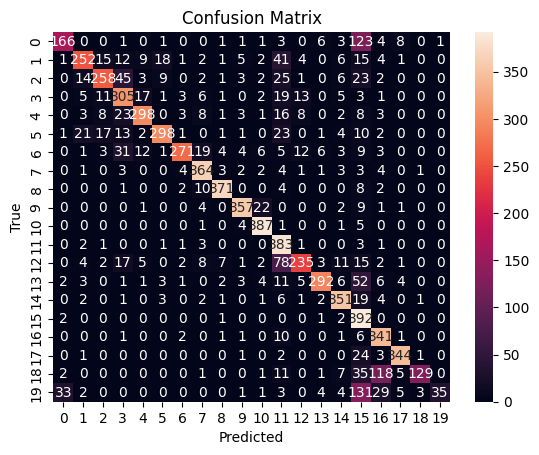

In [ ]:
#### Evaluation of the Model
matrix = confusion_matrix(test_data.target, y_pred)
sb.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(test_data.target, y_pred))

In [ ]:

#### Prediction for a New Unseen Text
def my_predictions(my_sentence, model):
all_categories_names = np.array(data.target_names)
prediction = nb.predict([my_sentence])
return all_categories_names[prediction]

my_sentence = "God"
print(my_predictions(my_sentence, nb))


IndentationError: expected an indented block after function definition on line 2 (<ipython-input-19-64942cc8fcfa>, line 3)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline with TfidfVectorizer and MultinomialNB
nb = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit the model to the training data
nb.fit(data.data, data.target)

def my_predictions(my_sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([my_sentence])
    return all_categories_names[prediction]

my_sentence = "God is love"
print(my_predictions(my_sentence, nb))

['soc.religion.christian']


In [ ]:
my_sentence = "I am using Microsoft Windows Operating System"
print(my_predictions(my_sentence, nb))

['comp.os.ms-windows.misc']


In [ ]:
my_sentence = "India is a parliamentary secular democratic republic"
print(my_predictions(my_sentence, nb))

['talk.politics.mideast']
